# Getting Subtypes and Primary Diseases

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr
import networkx as nx
from scipy.stats import hypergeom

In [2]:
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")
#effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_effect.csv")
#dep = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_dependencyQ1.csv")
#dep = dep.rename(columns={'Unnamed: 0': "DepMap_ID"})
#dep = pretty_gene_names(dep)
#effect = pretty_gene_names(effect)
#data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

In [28]:
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

In [9]:
data = pretty_gene_names(data)

In [10]:
CLines = list(set.intersection(set(data.CCLE_Name.values),set(effect.index.values)))

In [54]:
CLines

['LNZ308',
 'NCIH1975',
 'SMZ1',
 'H103',
 'KYSE150',
 'JHC7',
 'HS578T',
 'GP5D',
 'BICR78',
 'SHI1',
 'FU97',
 'COLO800',
 'ABC1',
 'NCIH526',
 'CII',
 'RPMI8226',
 'TF1',
 'T98G',
 'CCLP1',
 'HARA',
 'BOKU',
 'MUGCHOR1',
 'HLF',
 'LN235',
 'U937',
 'OV7',
 'COLO678',
 'KYSE510',
 'UMUC16',
 'BXPC3',
 'HT',
 'EMTOKA',
 'DB',
 'MELJUSO',
 'SNU387',
 'D341MED',
 'HS294T',
 'SNU410',
 'JHH4',
 'HUCCT1',
 'RCC10RGB',
 'NCIN87',
 'YH13',
 'EWS502',
 'SNUC4',
 'C84',
 'PLCPRF5',
 'HT115',
 'MB1',
 'HKA1',
 'HS852T',
 'KP2',
 'SLR26',
 'HCC827GR5',
 'MM370',
 'COV434',
 'SNU478',
 'HCC1359',
 'KPNYN',
 'TTC642',
 'HKGZCC',
 'NCIH322',
 'DAOY',
 'ECGI10',
 'SKOV3',
 'NP5',
 'CHP212',
 'RVH421',
 'TOV21G',
 'VMRCRCW',
 'PANC1',
 'SF268',
 'C33A',
 'UMUC9',
 'WM1799',
 'ONCODG1',
 'SUM159PT',
 'SKMEL19',
 'KKU100',
 'CCLFPEDS0008T',
 'OE21',
 'HCC1937',
 'JHH7',
 'HCC1806',
 'KMCH1',
 'D458',
 'TUHR4TKB',
 'TO14',
 'KYSE70',
 'OCUG1',
 'MV411',
 'SNU182',
 'NCIH727',
 'G292CLONEA141B1',
 'SW98

In [42]:
#data['Subtype'].values

'Adenocarcinoma, high grade serous'

## Wir haben 21 listen, die abhängig von Identitaet als Onkogen oder Tumorsuppressor gerankt sind. Dann die Ranks der 19 Paare addieren und wieder ordnen.
## Von diesen werden dann die ersten 5 bzw 10 Prozent der daten genommen und subtype/primary disease angeschaut und ein signifikanztest gegen den Rest gemacht.

In [2]:
uli_list = [['CDK4','RB1'],['CDK4','CDKN2C'],['CDK4','CCND1'],['CDK6','CCND3'],['CDK6','CCNE1'],['CDK6','CDK4'],['CDKN2A','CDKN2B'],
['CDKN2A','CCNE1'],['NF2','AMOTL2'],['NF2','KIRREL1'],['NF2','TAOK1'],['NF2','LATS2'],['NF2','PTPN14'],['NF2','PTEN'],['NF2','ABL2'],['NF2','RAC1'],['NF2','CRK'],['NF2','DLG5'],['NF2','PKN2']]

UL2 = [i for j in uli_list for i in j]
UL2 = set(UL2)
UL2 = list(UL2)

In [9]:
ts_onko_classification = [allGenes[x].sum(skipna=True)/allGenes.shape[0] for x in UL2]

In [ ]:
# now with allGenes instead of effects

In [10]:
mydict = {}
for _ in UL2:
    if allGenes[_].sum(skipna=True)/allGenes.shape[0] > 0:
        mydict[_] = allGenes[_].sort_values(ascending=False)
    else:
        mydict[_] = allGenes[_].sort_values()

## Single Pair

In [29]:
cdk4_list = mydict['CDK4'].index.to_list()
cdk4_df = pd.DataFrame(cdk4_list)

rb1_list = mydict['RB1'].index.to_list()
rb1_df = pd.DataFrame(rb1_list)

In [30]:
ranked_index = {}
for _ in rb1_df.index:
    for j in cdk4_df.index:
        ranked_index[rb1_df.values[_][0] + '__' + cdk4_df.values[j][0]] = _ + j

In [12]:
dataX = [v for v in sorted(ranked_index.items(), key=lambda item: item[1])]
dataX

[('JHUEM1_ENDOMETRIUM__VCAP_PROSTATE', 0),
 ('JHUEM1_ENDOMETRIUM__MDAMB415_BREAST', 1),
 ('BIN67_OVARY__VCAP_PROSTATE', 1),
 ('JHUEM1_ENDOMETRIUM__NCIH2887_LUNG', 2),
 ('BIN67_OVARY__MDAMB415_BREAST', 2),
 ('SCCOHT1_OVARY__VCAP_PROSTATE', 2),
 ('JHUEM1_ENDOMETRIUM__SNU1544_LARGE_INTESTINE', 3),
 ('BIN67_OVARY__NCIH2887_LUNG', 3),
 ('SCCOHT1_OVARY__MDAMB415_BREAST', 3),
 ('TTC642_SOFT_TISSUE__VCAP_PROSTATE', 3),
 ('JHUEM1_ENDOMETRIUM__HCC1419_BREAST', 4),
 ('BIN67_OVARY__SNU1544_LARGE_INTESTINE', 4),
 ('SCCOHT1_OVARY__NCIH2887_LUNG', 4),
 ('TTC642_SOFT_TISSUE__MDAMB415_BREAST', 4),
 ('TO14_OVARY__VCAP_PROSTATE', 4),
 ('JHUEM1_ENDOMETRIUM__MDAMB453_BREAST', 5),
 ('BIN67_OVARY__HCC1419_BREAST', 5),
 ('SCCOHT1_OVARY__SNU1544_LARGE_INTESTINE', 5),
 ('TTC642_SOFT_TISSUE__NCIH2887_LUNG', 5),
 ('TO14_OVARY__MDAMB415_BREAST', 5),
 ('NCIH2030_LUNG__VCAP_PROSTATE', 5),
 ('JHUEM1_ENDOMETRIUM__RDES_BONE', 6),
 ('BIN67_OVARY__MDAMB453_BREAST', 6),
 ('SCCOHT1_OVARY__HCC1419_BREAST', 6),
 ('TTC642_SOF

In [13]:
ceL = [ x for x in range(0,200) for x in dataX[x][0].split('__')]
ceL = set(ceL)
cel = list(ceL)

In [14]:
ceL

{'BIN67_OVARY',
 'CHLA266_SOFT_TISSUE',
 'COGE352_BONE',
 'DMS53_LUNG',
 'ES2_OVARY',
 'EWS502_BONE',
 'FU97_STOMACH',
 'GCIY_STOMACH',
 'HCC1419_BREAST',
 'HCC2429_LUNG',
 'HEC1_ENDOMETRIUM',
 'HS852T_SKIN',
 'JHUEM1_ENDOMETRIUM',
 'JHUEM7_ENDOMETRIUM',
 'JM1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE',
 'K029AX_SKIN',
 'LS_AUTONOMIC_GANGLIA',
 'MDAMB415_BREAST',
 'MDAMB453_BREAST',
 'MEL290_UVEA',
 'MFE319_ENDOMETRIUM',
 'NCIH1915_LUNG',
 'NCIH2030_LUNG',
 'NCIH2887_LUNG',
 'NCIH3122_LUNG',
 'OCUM1_STOMACH',
 'OVMANA_OVARY',
 'PACADD188_PANCREAS',
 'RDES_BONE',
 'SCCOHT1_OVARY',
 'SNU1544_LARGE_INTESTINE',
 'TO14_OVARY',
 'TTC642_SOFT_TISSUE',
 'UMUC9_URINARY_TRACT',
 'VCAP_PROSTATE',
 'WM88_SKIN'}

## All Pairs

In [11]:
top_cellines = {}

for _ in uli_list:
    a,b = _
    a_list = mydict[a].index.to_list()
    a_df = pd.DataFrame(a_list)

    b_list = mydict[b].index.to_list()
    b_df = pd.DataFrame(b_list)

    ranked_index = {}
    for _ in a_df.index:
        for j in b_df.index:
            ranked_index[a_df.values[_][0] + '_' + b_df.values[j][0]] = _ + j

    dataX = [v for v in sorted(ranked_index.items(), key=lambda item: item[1])]
    ceL = [ x for x in range(0,200) for x in dataX[x][0].split('_')]
    ceL = set(ceL)
    ceL = list(ceL)
    top_cellines[a + '_' + b] = ceL
    
    # store the result

In [15]:
top_cellines.keys()

dict_keys(['CDK4_RB1', 'CDK4_CDKN2C', 'CDK4_CCND1', 'CDK6_CCND3', 'CDK6_CCNE1', 'CDK6_CDK4', 'CDKN2A_CDKN2B', 'CDKN2A_CCNE1', 'NF2_AMOTL2', 'NF2_KIRREL1', 'NF2_TAOK1', 'NF2_LATS2', 'NF2_PTPN14', 'NF2_PTEN', 'NF2_ABL2', 'NF2_RAC1', 'NF2_CRK', 'NF2_DLG5', 'NF2_PKN2'])

In [16]:
result_celllines = pd.DataFrame.from_dict(top_cellines)
#result_celllineselllines.to_csv('ranked_lists.csv')

ValueError: arrays must all be same length

In [21]:
[ len(x) for x in top_cellines.values() ]

[36, 36, 37, 32, 39, 39, 37, 39, 31, 29, 31, 39, 36, 35, 34, 35, 36, 34, 34]

In [30]:
top_c = {}

for _ in top_cellines.keys():
    top_c[_] = top_cellines[_][0:29]

In [37]:
result_celllines = pd.DataFrame.from_dict(top_c)
result_celllines.to_csv('/home/annerer/Dokumente/ranked_lists')

In [34]:
result_celllines

,CDK4_RB1,CDK4_CDKN2C,CDK4_CCND1,CDK6_CCND3,CDK6_CCNE1,CDK6_CDK4,CDKN2A_CDKN2B,CDKN2A_CCNE1,NF2_AMOTL2,NF2_KIRREL1,NF2_TAOK1,NF2_LATS2,NF2_PTPN14,NF2_PTEN,NF2_ABL2,NF2_RAC1,NF2_CRK,NF2_DLG5,NF2_PKN2
0,ES2,ES2,ES2,EOL1,SNU8,ES2,JHH5,SNU8,SNU668,SNU668,SNU668,SNU668,SNU668,SNU668,SNU668,SNU668,SNU668,SNU668,SNU668
1,JHUEM7,TC205,WM1799,KMS20,SNU1077,KMS20,HOP62,RH18DM,TOV21G,TOV21G,TOV21G,TOV21G,TOV21G,TOV21G,TOV21G,TOV21G,TOV21G,SNU8,SNU8
2,TTC642,TC32,MDAMB453,MM1S,KMS20,MM1S,RH18DM,SNU1077,ISTMES2,SF539,SNU8,PATU8902,ISTMES2,RPMI8226,HS939T,CW9019,LCLC103H,TOV21G,TOV21G
3,MDAMB453,MDAMB453,MALME3M,OPM2,JHUEM7,MDAMB453,SNU398,HOP62,CW9019,CW9019,CW9019,SKGI,UOK101,HUH6,TTC642,RVH421,CW9019,BOKU,CW9019
4,SCCOHT1,CCLFPEDS0001T,UMUC16,SEM,MM1S,OPM2,HSB2,JHUEM7,KKU100,KKU100,KKU100,CW9019,HSB2,TC32,CW9019,KKU100,KKU100,UOK101,T24
5,NCIH2030,TC138,SKNFI,U937,OPM2,U937,H413,G401,NCIH2030,NCIH2030,NCIH2030,KKU100,CW9019,CW9019,EPLC272H,NCIH2030,UMUC16,CW9019,KKU100
6,HCC1419,NB1643,LPS6,KARPAS422,U937,KARPAS422,G401,MSTO211H,CCLFPEDS0008T,OV7,ECC2,TC138,KKU100,ASPC1,KKU100,ONDA7,NCIH2030,CCLFPEDS0001T,NCIH2030
7,LS,KNS42,NCIH2052,SHI1,KARPAS422,HCC1419,MSTO211H,NCIH460,OV7,PA1,SH10TC,NCIH2030,NCIH2030,KKU100,NCIH2030,NCIH747,ECC2,KKU100,U343
8,JM1,LS,NB1643,TFK1,EFO21,PACADD188,NCIH460,SUM159PT,LS,KMRC1,OV7,CII,ONDA7,NCIH2030,OV7,U343,OV7,NCIH2030,OV7
9,PACADD188,HCC1419,HCC1419,HEL9217,KLE,TFK1,SUM159PT,EFO21,PA1,HS852T,PA1,OV7,TUHR10TKB,OV7,PA1,OV7,PA1,ECC2,HUCCT1


In [34]:
cdk6_cdk4 = top_cellines['CDK6_CDK4']

## We need to get rid of the celllines that are in DepMap but have no annotation

In [68]:
[data[data['stripped_cell_line_name'].str.match(_)]['Subtype'].values for _ in cdk6_cdk4]
#[data[data['CCLE_Name'].str.match(_)]['primary_disease'].values for _ in depprod]

[array(['Adenocarcinoma'], dtype=object),
 array(['Ductal Adenocarcinoma, exocrine'], dtype=object),
 array([], dtype=object),
 array(['Multiple Myeloma'], dtype=object),
 array(['Diffuse Large B-cell Lymphoma (DLBCL)', 'Glioblastoma'],
       dtype=object),
 array(['Adenocarcinoma'], dtype=object),
 array([], dtype=object),
 array(['Diffuse Large B-cell Lymphoma (DLBCL)'], dtype=object),
 array([], dtype=object),
 array(['Multiple Myeloma'], dtype=object),
 array([], dtype=object),
 array(['Non-Small Cell Lung Cancer (NSCLC), Adenocarcinoma'], dtype=object),
 array(['Non-Small Cell Lung Cancer (NSCLC), unspecified'], dtype=object),
 array(['Breast Ductal Carcinoma'], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array(['Acute Myelogenous Leukemia (AML), M6 (Erythroleukemia)'],
       dtype=object),
 array(['Adenocarcinoma, clear cell'], dtype=object),
 array(['Ewings Sarcoma'], dtype=object),
 array([], dtype=object),
 array([], dtype=ob

In [74]:
#[data[data['stripped_cell_line_name'].str.match(_)]['primary_disease'].values for _ in cdk6_cdk4]

boolean_series = data.stripped_cell_line_name.isin(cdk6_cdk4)
cdk6_cdk4_df = data[boolean_series]['primary_disease']

In [82]:
df = pd.DataFrame(cdk6_cdk4_df)

In [91]:
df

,primary_disease
INDEX,
HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia
OPM2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Myeloma
RDES_BONE,Bone Cancer
VCAP_PROSTATE,Prostate Cancer
SNU308_BILIARY_TRACT,Gallbladder Cancer
HCC2429_LUNG,Lung Cancer
THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia
NCIH2887_LUNG,Lung Cancer
HS852T_SKIN,Skin Cancer


In [90]:
a = ['Leukemia']
b = df.primary_disease.isin(a)
df[b]

,primary_disease
INDEX,
HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia
THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia
MOLM13_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia
U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia
AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia
SEMK2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia


In [126]:
top_cellines.keys()

dict_keys(['CDK4_RB1', 'CDK4_CDKN2C', 'CDK4_CCND1', 'CDK6_CCND3', 'CDK6_CCNE1', 'CDK6_CDK4', 'CDKN2A_CDKN2B', 'CDKN2A_CCNE1', 'NF2_AMOTL2', 'NF2_KIRREL1', 'NF2_TAOK1', 'NF2_LATS2', 'NF2_PTPN14', 'NF2_PTEN', 'NF2_ABL2', 'NF2_RAC1', 'NF2_CRK', 'NF2_DLG5', 'NF2_PKN2'])

In [54]:
# get this function to also return the cell types, so you can merge with those based on the index in the later step.


def get_prd_and_sub(key):
    pair = top_cellines[key]
    boolean_series = data.stripped_cell_line_name.isin(pair)
    prd_df = data[boolean_series]['primary_disease']
    sub_df = data[boolean_series]['Subtype']

    prd = pd.DataFrame(prd_df)
    sub = pd.DataFrame(sub_df)
    return [prd,sub]

In [120]:
# ['Subtype'].str.match('(AML)')

In [79]:
#testc = top_cellines
#testd = pd.concat([testc,prd], axis=1, sort=False)

In [78]:
#
#pd.DataFrame.from_dict(top_cellines)
#top_cellines

In [77]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [1]:
prd,sub = get_prd_and_sub('NF2_RAC1')

NameError: name 'get_prd_and_sub' is not defined

In [41]:
prd,sub = get_prd_and_sub('CDKN2A_CDKN2B')

In [33]:
prd.sort_values(by='primary_disease')

,primary_disease
1446,Bile Duct Cancer
1294,Bile Duct Cancer
208,Bile Duct Cancer
1426,Bile Duct Cancer
721,Bladder Cancer
519,Bladder Cancer
1340,Brain Cancer
501,Brain Cancer
468,Brain Cancer
35,Brain Cancer


In [40]:
t = ['Lung Cancer']
boolean = prd.primary_disease.isin(top_cellines['NF2_RAC1'])
prd[boolean]

,primary_disease


In [31]:
6/prd.shape[0]

0.16216216216216217

In [48]:
dataz.index

Index(['HEL', 'HEL9217', 'LS513', 'C2BBE1', '253J', 'HCC827', 'ONCODG1',
       'HS294T', 'NCIH1581', 'SKBR3',
       ...
       'A375', 'A375', 'A375', 'A375', 'UACC62', 'UACC62', 'SKMEL19', 'MEL285',
       'MEL290', 'UCH2'],
      dtype='object', length=783)

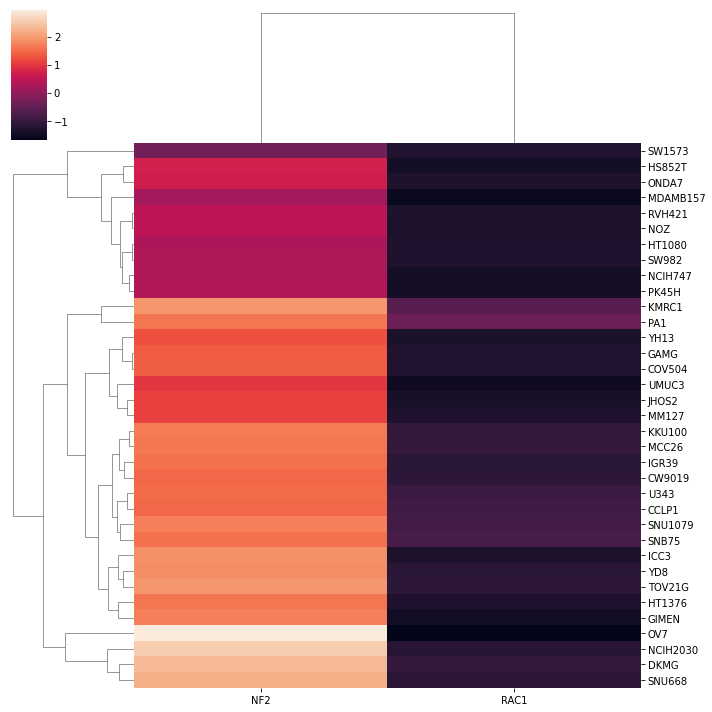

In [48]:
import seaborn as sns
dataz = allGenes[['NF2','RAC1']]

a = top_cellines['NF2_RAC1']

datay = dataz.index.isin(a)

datay = dataz[datay]
g = sns.clustermap(datay)
g.savefig('/home/annerer/Dokumente/clustermap_NF2_RAC1')
#plt.title('A')
#lut = dict(zip(prd.primary_disease, "rbg"))
#row_colors = datay.index.map(lut)

#g = sns.clustermap(datay, row_colors=row_colors)

In [51]:
prd

,primary_disease
35,Brain Cancer
53,Sarcoma
97,Brain Cancer
131,Ovarian Cancer
208,Bile Duct Cancer
243,Brain Cancer
273,Skin Cancer
343,Gastric Cancer
402,Colon/Colorectal Cancer
467,Pancreatic Cancer


Text(709.5999999999999, 0.5, 'Genes')

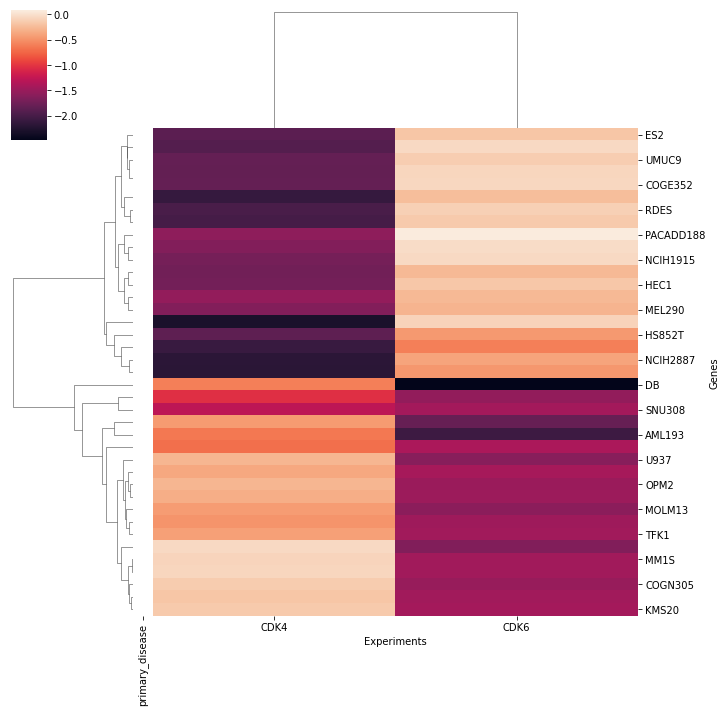

In [17]:
import seaborn as sns
dataz = allGenes[['CDK4','CDK6']]

a = top_cellines['CDK6_CDK4']

datay = dataz.index.isin(a)

datay = dataz[datay]
g = sns.clustermap(datay,row_colors=prd)
g.savefig('/home/annerer/Dokumente/clustermap_CDK6_CDK4')
g.ax_heatmap.set_xlabel('Experiments')
g.ax_heatmap.set_ylabel('Genes')
#row_colors=row_colors
# this should be possible if i combine the prd dataframe with the datay

In [50]:
datay.columns  # add to this dataframe the primary diseases. then use them to draw the correct figure
annotated_datay = pd.merge(datay,prd,on=datay.index.values)

KeyError: array(['HEL9217', 'OPM2', 'RDES', 'VCAP', 'SNU308', 'HCC2429', 'THP1',
       'NCIH2887', 'HS852T', 'HCC1419', 'EWS502', 'KARPAS422', 'DB',
       'NCIH3122', 'MOLM13', 'SUDHL4', 'U937', 'KMS20', 'NCIH1915',
       'IGR39', 'AML193', 'FU97', 'DMS53', 'MM1S', 'OCIMY5', 'NCIH1568',
       'MDAMB415', 'ES2', 'MDAMB453', 'COGE352', 'COGN305', 'PACADD188',
       'UMUC9', 'HEC1', 'HSC1', 'TFK1', 'SEMK2', 'SNU1544', 'MEL290'],
      dtype=object)

In [47]:
datay.columns

Index(['CDK4', 'CDK6'], dtype='object')

In [56]:
prd

,primary_disease
35,Brain Cancer
53,Sarcoma
97,Brain Cancer
131,Ovarian Cancer
208,Bile Duct Cancer
243,Brain Cancer
273,Skin Cancer
343,Gastric Cancer
402,Colon/Colorectal Cancer
467,Pancreatic Cancer


In [59]:
ghir = data['stripped_cell_line_name'].to_list()
ghir = set(ghir)

In [65]:
ghar = allGenes.index.to_list()

In [64]:
print(len(ghar),len(ghir))

765 1804


In [63]:
len(set.intersection(ghir,ghar))

764

In [6]:
pip install arviz

     |████████████████████████████████| 1.5 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 54.1 MB/s eta 0:00:01
     |████████████████████████████████| 720 kB 36.7 MB/s eta 0:00:01
     |████████████████████████████████| 271 kB 43.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import arviz as az

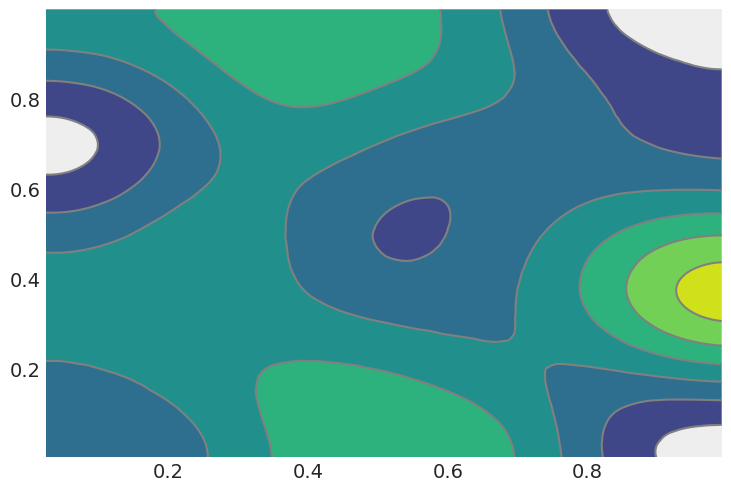

In [9]:
az.style.use("arviz-darkgrid")

az.plot_kde(np.random.rand(100), np.random.rand(100))

plt.show()

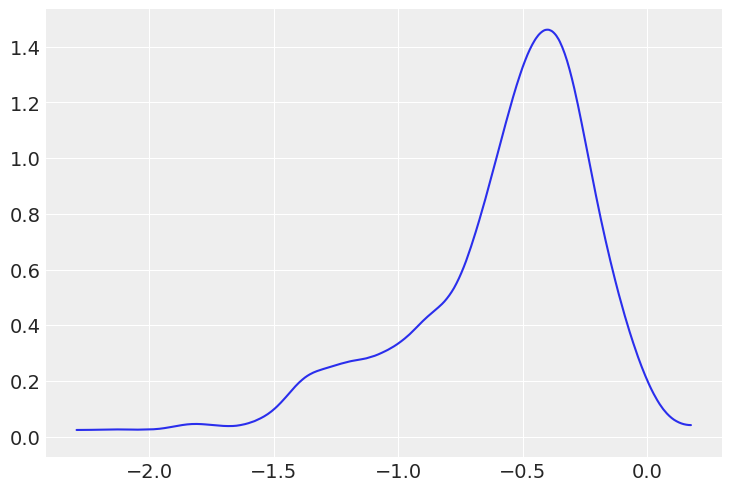

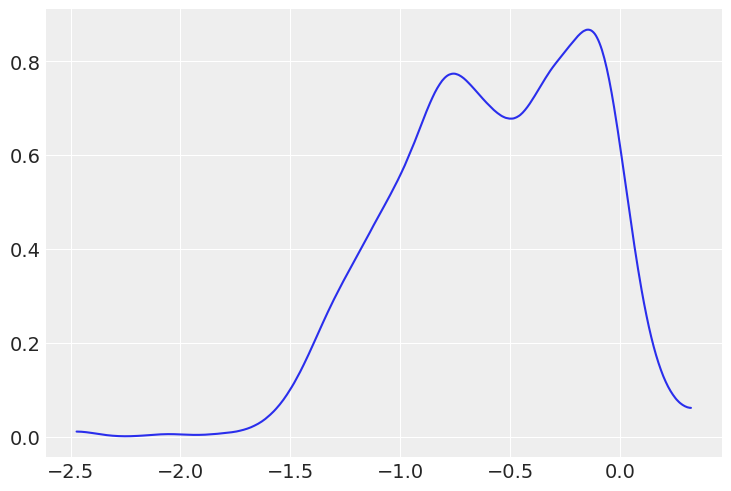

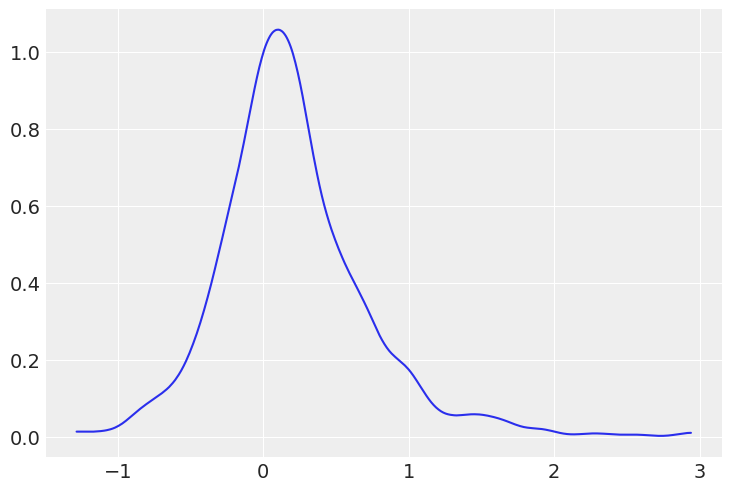

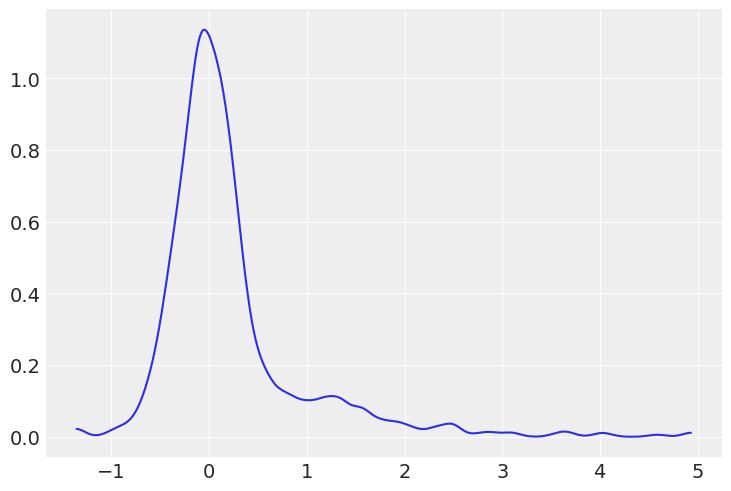

In [15]:
az.plot_kde(allGenes['CDK4'])
az.plot_kde(allGenes['CDK6'])
az.plot_kde(allGenes['NF2'])
az.plot_kde(allGenes['TP53'])



plt.show()

TypeError: `data` argument must have the group "posterior_predictive"

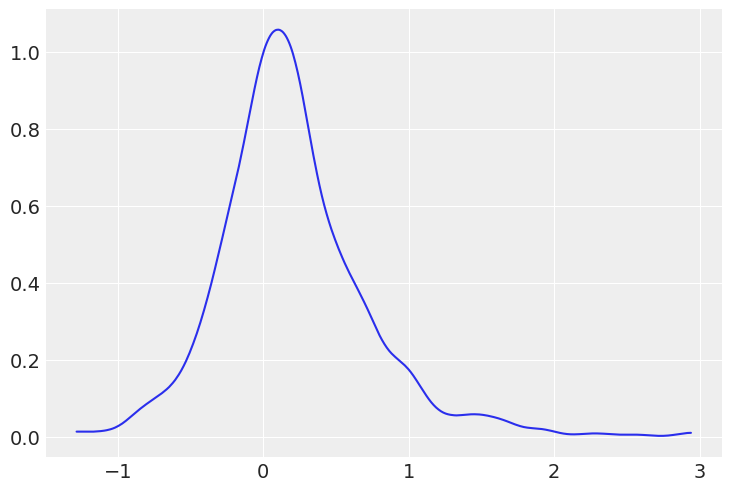

In [25]:

az.style.use("arviz-darkgrid")

data = allGenes['NF2']
az.plot_kde(data)
az.plot_bpv(data, kind="p_value")

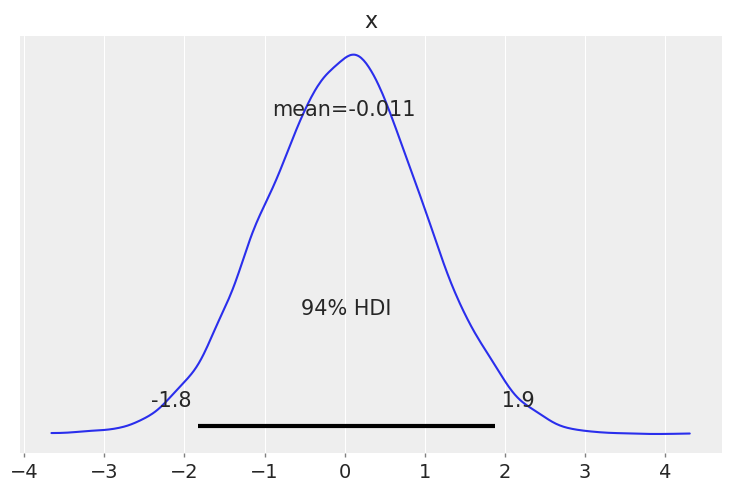

In [27]:
az.plot_posterior(np.random.randn(100_00));

In [29]:
import scipy.stats as stats

Text(0, 0.5, 'p(X)')

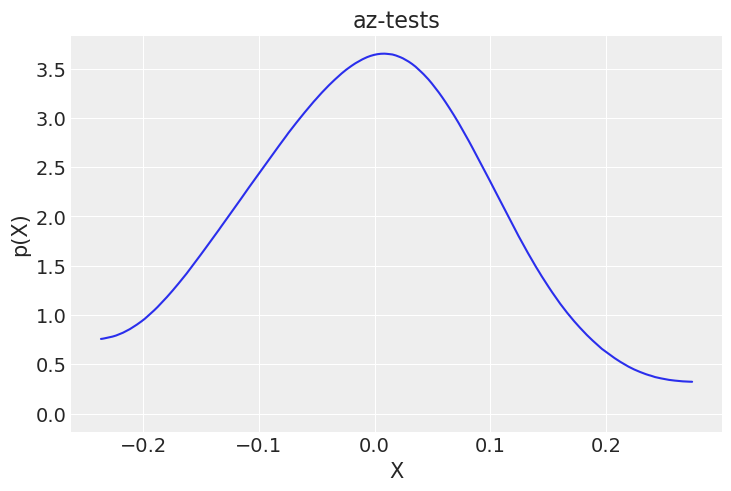

In [86]:

mu = 0
sig = 0.1
X = stats.norm(mu,sig)
x = X.rvs(100)

az.plot_kde(x)
plt.title('az-tests')
plt.xlabel('X')
plt.ylabel('p(X)')

[]

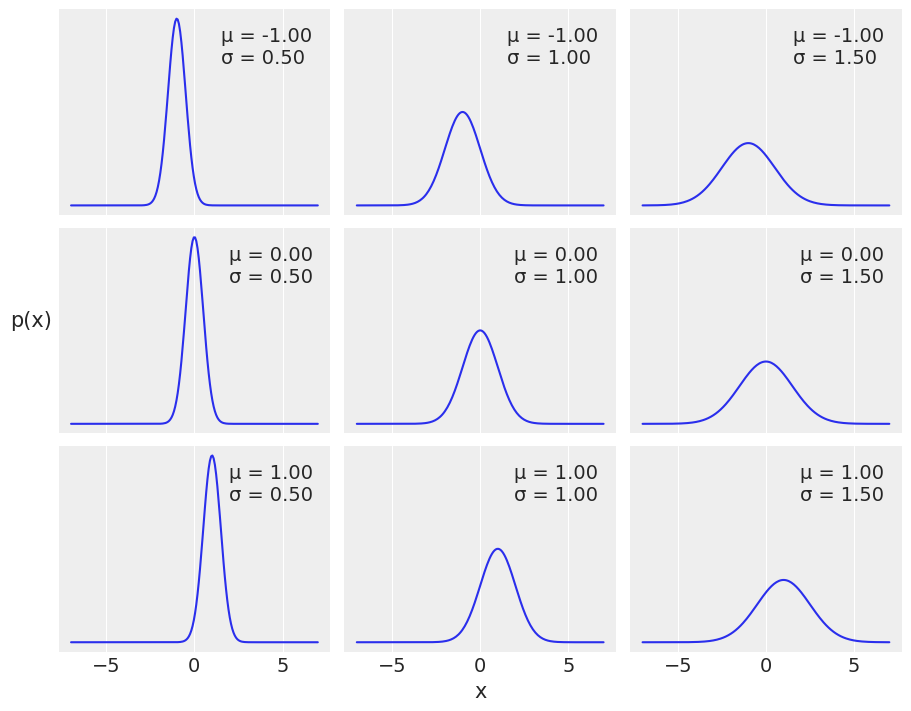

In [49]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 200)
_, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True,
sharey=True,
figsize=(9, 7), constrained_layout=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mu,
        sd), alpha=0)
        ax[i,j].legend(loc=1)
ax[2,1].set_xlabel('x')
ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20)
ax[1,0].set_yticks([])

In [87]:
np.random.seed(123)
trials = 4
theta_real = 0.35 # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)

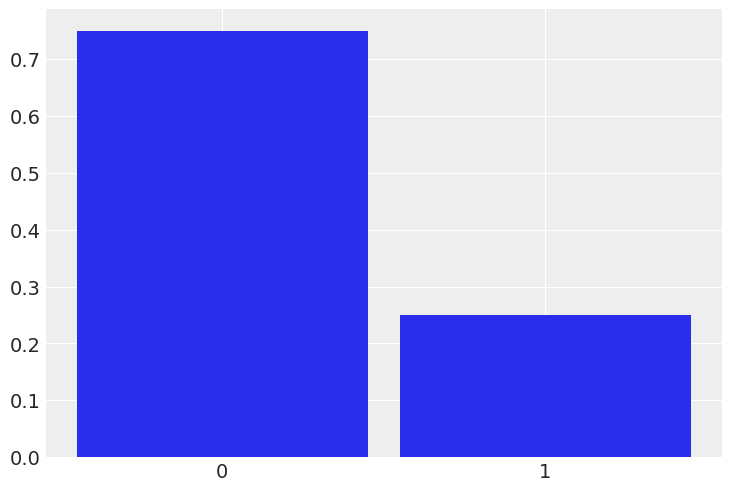

In [89]:
az.plot_dist(data)

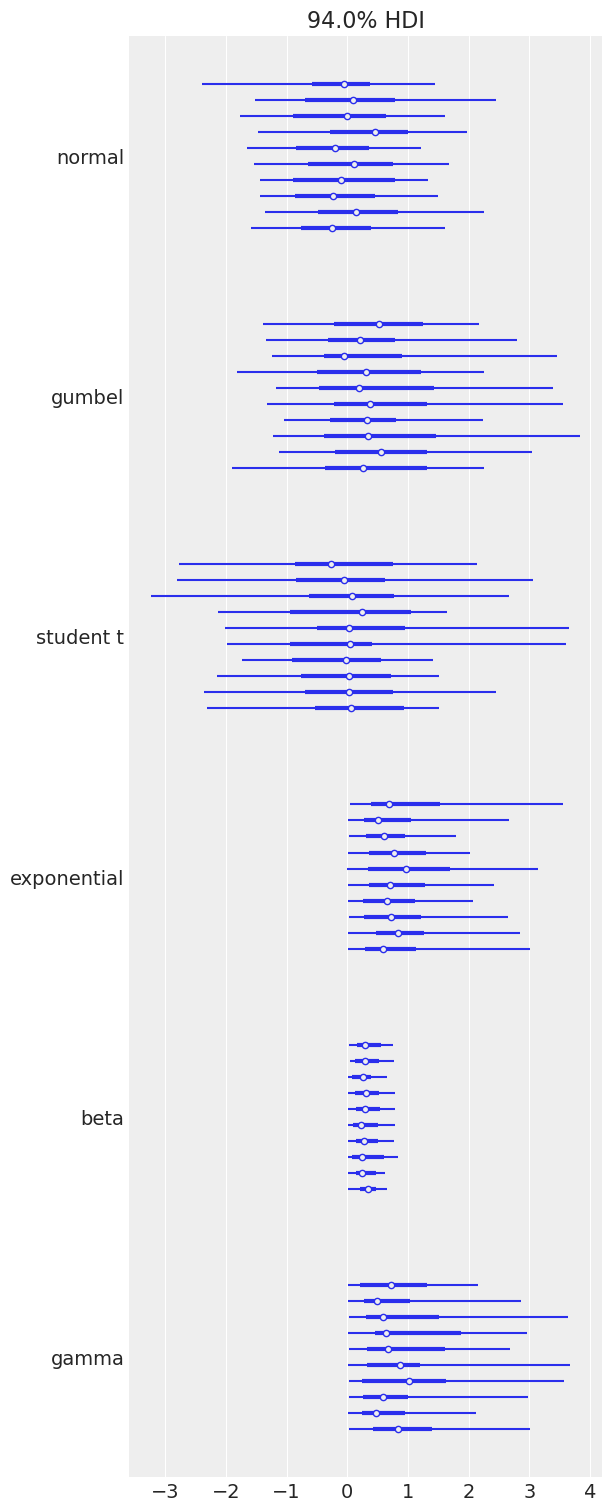

In [103]:
size = (10, 50)
a = 1
b = 2
az.plot_forest(
    {
        "normal": np.random.randn(*size),
        "gumbel": np.random.gumbel(size=size),
        "student t": np.random.standard_t(df=6, size=size),
        "exponential": np.random.exponential(size=size),
        'beta':np.random.beta(a,b,size=size),
        'gamma':np.random.gamma(1,1,size=size)
    }
);

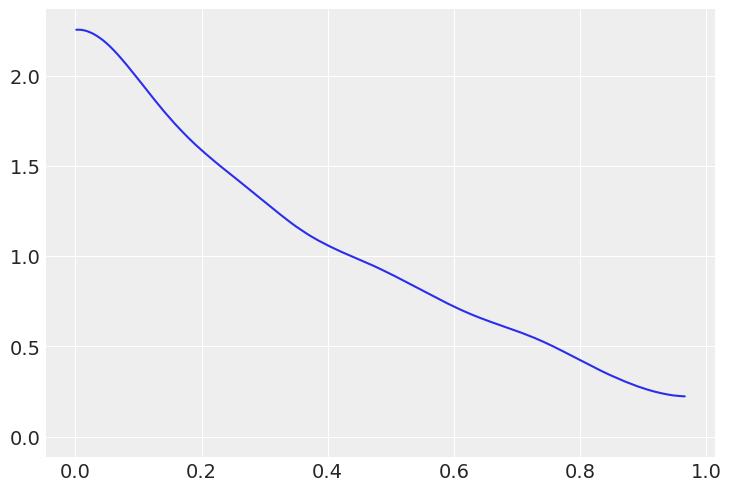

In [101]:
data = np.random.beta(1,2,size=size)
az.plot_kde(data)

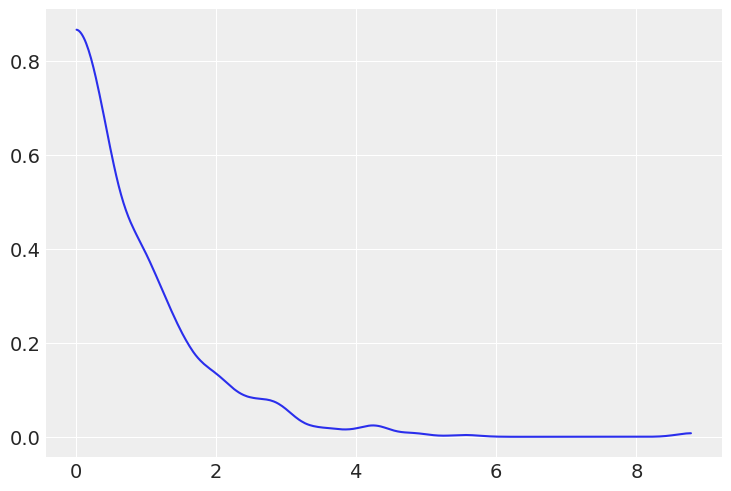

In [102]:
data = np.random.gamma(1,1,size=size)
az.plot_kde(data)

In [106]:
import pymc3 as pm

In [110]:
with pm.Model() as our_first_model:
    theta = pm.Beta('θ', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=theta, observed=data)
    trace = pm.sample(1000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


/home/annerer/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/annerer/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
Bad initial energy, check any log probabilities that are inf or -inf, nan or very small:
y   -inf


ParallelSamplingError: Bad initial energy

/home/annerer/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/annerer/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [13]:
import numpy as np

np.random.seed(1)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)
#x = np.random.normal(10, 1, N)
x = allGenes['CDK4'][0:100].to_list()
y_real = allGenes['CDK6'][0:100].to_list() + beta_real * x
y = y_real + eps_real
_, ax = plt.subplots(1,2, figsize=(8, 4))
ax[0].plot(x, y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, y_real, 'k')
az.plot_kde(y, ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()

TypeError: can't multiply sequence by non-int of type 'float'

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import theano.tensor as tt

# Data points (hardcoded for this example)
x_points = np.array([0.48574, 0.54206, 0.50821, 0.44593, 0.40873, 0.20569, 0.08038, 0.30518, 0.0117, 0.29974, 0.28977, 0.32806, 0.32496, 0.38357, 0.45617, 0.50823, 2.51709, 1.98823, 1.78779, 1.58633, 1.23946, 1.25441, 1.26188, 1.12205, 0.94541, 1.19891, 0.76849, 0.72581, 1.46885, 0.66112, 0.74459, 0.75426, 2.10072, 0.68885, 0.67268, 0.61371, 2.45453, 1.6277, 2.37253, 1.13018, 2.12139, 1.59796, 1.58462, 0.62712, 1.34953, 1.18484, 1.25131, 1.22118, 0.76266, 1.13954, 0.76647, 1.11719, 0.67664, 0.98378, 1.4421, 1.09343])
y_points = np.array([8.62361, 8.58473, 8.67064, 8.66751, 8.61314, 8.62788, 8.66276, 8.62828, 8.72265, 8.67101, 8.65285, 8.58985, 8.68368, 8.63772, 8.61623, 8.57461, 8.3868, 8.35645, 8.37346, 8.32565, 8.48552, 8.43744, 8.41082, 8.45783, 8.47807, 8.29072, 8.54428, 8.65165, 8.4924, 8.57238, 8.57266, 8.58867, 8.35816, 8.62443, 8.5474, 8.56266, 8.25485, 8.38961, 8.30199, 8.46212, 8.4369, 8.37571, 8.25825, 8.58458, 8.37271, 8.35321, 8.36903, 8.33309, 8.62743, 8.36992, 8.61193, 8.38307, 8.61207, 8.54401, 8.42055, 8.53708])
y_uncs = np.array([0.0248, 0.03579, 0.02606, 0.02971, 0.03022, 0.02502, 0.02804, 0.03037, 0.03231, 0.03425, 0.02947, 0.02574, 0.03058, 0.04417, 0.03605, 0.03535, 0.02104, 0.06762, 0.06982, 0.02122, 0.0294, 0.0323, 0.03731, 0.02887, 0.0274, 1.22413, 0.03399, 0.01714, 0.07119, 0.03327, 0.03677, 0.02801, 0.0187, 0.02771, 0.02941, 0.02072, 0.05694, 0.03161, 0.03679, 0.01321, 0.02408, 0.01769, 0.07938, 0.02357, 0.08276, 0.01337, 0.01767, 0.06916, 0.01688, 0.01702, 0.0297, 0.01779, 0.01614, 0.04123, 0.0342, 0.02855])

# Initially, use simple least-squares fit to inform priors and test values
leastsq_fit = np.polyfit(x_points, y_points, 1, w=y_uncs**-1)

# Set up PyMC3 model to model relation
model = pm.Model()
with model:

    # Specify prior for intercept
    intercept = pm.Normal('Intercept', mu=leastsq_fit[1], sd=y_points.std(), testval=leastsq_fit[1])

    # Specify prior for gradient
    gradient = pm.Normal('Gradient', mu=leastsq_fit[0], sd=leastsq_fit[0], testval=leastsq_fit[0])

    # Determine expected value
    z_expected = ( gradient * x_points ) + intercept

    # Calculate residuals, to inform psi
    residuals = z_expected - y_points
    
     # Specify prior for psi, the scale of the additional scatter arising from intrinsic variation
    psi = pm.HalfNormal('Psi', sd=tt.mean(tt.abs_(residuals)), testval=tt.mean(tt.abs_(residuals)))

    # Determine combined scatter by adding psi and uncertainties in quadrature
    sigma = ( psi**2.0 + y_uncs**2.0 )**0.5

    # Specify likelihood distribution of points
    z_likelihood = pm.Normal('z_likelihood', mu=z_expected, sd=sigma, observed=y_points)

    # Sample posterior distriution
    trace = pm.sample(draws=5000, tune=1000)
    #trace = pm.sample(step=pm.Metropolis(), draws=100000, njobs=4, tune=5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Psi, Gradient, Intercept]


/home/annerer/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '8210')
INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '8211')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/annerer/.theano/compiledir_Linux-4.15--generic-x86_64-with-glibc2.10-x86_64-3.8.3-64/lock_dir
/home/annerer/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
Bad initial energy, check any log probabilities that are inf or -inf, nan or very small:
Gradient   -inf


ParallelSamplingError: Bad initial energy

/home/annerer/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/annerer/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [23]:
data = az.load_arviz_data("centered_eight")

In [24]:
data

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> observed_data

In [4]:
def pretty_gene_names(dataset):
    mapping = {}

    for i in np.arange(0,data.shape[0],1):
        mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

    dataset["INDEX"] = dataset.DepMap_ID
    dataset = dataset.set_index('INDEX')
    dataset = dataset.rename(index=mapping)

    # "DepMap_ID
    dataset = dataset.drop("DepMap_ID",1)

    gene = dataset.columns.to_list()
    # split at space
    for i in range(len(gene)):
        gene[i] = gene[i].split(" ") 

    genes = []
    for i in range(len(gene)):
        genes.append(gene[i][0])
    
    dataset.columns = genes
    return dataset

In [5]:
effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_effect.csv")
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

effect["INDEX"] = effect.DepMap_ID
effect = effect.set_index('INDEX')
effect = effect.rename(index=mapping)
effect = effect.drop("DepMap_ID",1)

gene = effect.columns.to_list()
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ") 

genes = []
for i in range(len(gene)):
    genes.append(gene[i][0])
                 
effect.columns = genes


cellLine = effect.index.to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines = []
for i in range(len(cellLine)):
    cellLines.append(cellLine[i][0])
    
effect.index = cellLines

cellLine = data['CCLE_Name'].to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines1 = []
for i in range(len(cellLine)):
    cellLines1.append(cellLine[i][0])
    
data['CCLE_Name'] = cellLines1


a = set(cellLines)
b = set(data["CCLE_Name"])
c = set.intersection(a,b)

print(len(a))
print(len(b))
print(len(c))

cellL = c
allGenes = effect[effect.columns.intersection(cellL)]

765
1781
765


In [6]:
effect = effect.transpose()
intersect = list(set.intersection(set(allGenes.index.to_list()), set(cellL)))
allGenes = effect[effect.columns.intersection(cellL)]

allGenes.shape
allGenes = allGenes.transpose()

allGenes.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
HEL,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117
